In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from py_cFBA import *

# Function to plot metabolite profiles
# Args:
# - metabolite: name of the metabolite to plot
# - color_met: color of the plot line
def plot_met(t, metabolite, amounts, imbalanced_mets, color_met):
    for i, met in enumerate(imbalanced_mets):
        if met == metabolite:
            plt.plot(t, amounts[i, :], '.-', color=color_met, label=met)
            plt.legend()
            plt.xlabel('Time (h)')
            plt.ylabel('Metabolite levels (mol/mol$_{biomass}$)')

# Function to plot flux profiles
# Args:
# - flux: name of the flux (reaction) to plot
# - color_flx: color of the plot line
def plot_flux(t, flux, color_flx):
    for i, rxn in enumerate(rxns):
        if rxn == flux:
            plt.step(t[:-1], fluxes[i, :], '.--', color=color_flx, label=flux)
            plt.legend()
            plt.xlabel('Time (h)')
            plt.ylabel('Reaction rate (mol/mol$_{biomass}$/h)')
            
            
def run_simulation(excel_file, output_file, quotas, dt):
    # Create SBML file for the model
    excel_to_sbml(excel_file, output_file)
    
    # Variables model
    S_mat = pd.read_excel(excel_file, sheet_name='S_mat', index_col=0, header=0)
    imbalanced_mets = list(pd.read_excel(excel_file, sheet_name='Imbalanced_mets')['Met'])

    # Generate the Linear Programming (LP) model components for cFBA
    cons, Mk, imbalanced_mets, nm, nr, nt = generate_LP_cFBA(output_file, quotas, dt)

    # Test optimization with a specific alpha value
    alpha_test = 1
    prob = create_lp_problem(alpha_test, [*cons], Mk, imbalanced_mets)
    status = prob.optimize()
    print('Test on model with no growth:', status)

    # Find the optimal alpha value
    print('Time simulation:')
    alpha, prob = find_alpha(cons, Mk, imbalanced_mets)
    print('Growth of the system: {:.4f}'.format(alpha))

    # Retrieve the solution (fluxes, amounts, and time points)
    fluxes, amounts, t = get_fluxes_amounts(output_file, prob, dt)

    # Plot the metabolite changes over time
    colors = ['#a6cee3', '#1f78b4', '#b2df8a']

    plt.figure(figsize=[5, 3])
    plt.subplot(1, 2, 1)
    plot_met(t, quotas[2][1], amounts, imbalanced_mets, colors[0])  # Plot 'Storage' metabolite levels (adjust as per your needs)
    plot_met(t, 'Glyc', amounts, imbalanced_mets, colors[1])  # Example plot 'Storage' metabolite levels
    # plot_met('Biomass', colors[2])  # Plot 'Biomass' metabolite levels
    # plt.ylim([-0.1, 2.7])  # Set y-axis limits

    plt.subplot(1, 2, 2)
    plot_met(t, 'PHB', amounts, imbalanced_mets, colors[1])  # Plot 'Enzymes' metabolite levels
    plot_met(t, 'PH2MV', amounts, imbalanced_mets, colors[2])  # Example plot 'Enzymes' metabolite levels
    plt.ylabel(None)  # Remove y-axis label

    plt.tight_layout()
    plt.show()


### Aspartate


SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_aspartate.xml.
Test on model with no growth: optimal
Time simulation:
0.03 min
Growth of the system: 2.2871


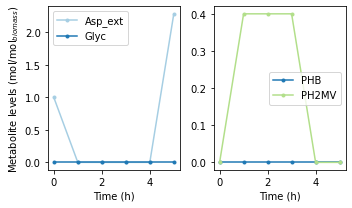

In [2]:

# Function usage on aspartate:
excel_file = 'cFBA_base_aspartate.xlsx'
output_file = 'cFBA_base_aspartate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'Asp_ext', 0, 1],
    ['equality', 'Asp_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Glutamate



SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_glutamate.xml.
Test on model with no growth: optimal
Time simulation:
0.03 min
Growth of the system: 3.4135


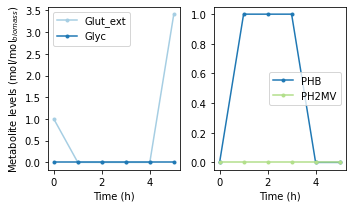

In [3]:
# Function usage on glutamate:
excel_file = 'cFBA_base_glutamate.xlsx'
output_file = 'cFBA_base_glutamate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'Glut_ext', 0, 1],
    ['equality', 'Glut_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Propionate

SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_propionate.xml.
Test on model with no growth: optimal
Time simulation:
0.04 min
Growth of the system: 2.1995


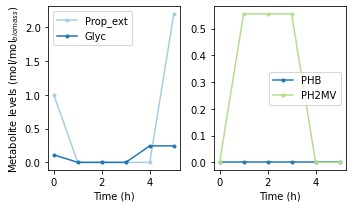

In [4]:
# Function usage on propionate:
excel_file = 'cFBA_base_propionate.xlsx'
output_file = 'cFBA_base_propionate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'Prop_ext', 0, 1],
    ['equality', 'Prop_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Citrate

SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_citrate.xml.
Test on model with no growth: optimal
Time simulation:
0.03 min
Growth of the system: 3.4135


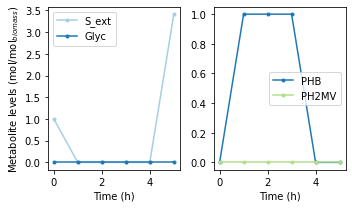

In [5]:
# Function usage on citrate:
excel_file = 'cFBA_base_citrate.xlsx'
output_file = 'cFBA_base_citrate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'S_ext', 0, 1],
    ['equality', 'S_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# alpha KG

SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_akg.xml.
Test on model with no growth: optimal
Time simulation:
0.04 min
Growth of the system: 3.2186


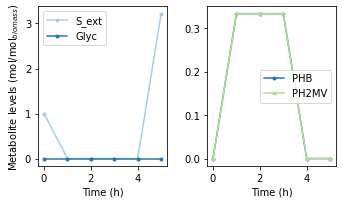

In [6]:
# Function usage on akg:
excel_file = 'cFBA_base_akg.xlsx'
output_file = 'cFBA_base_akg.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'S_ext', 0, 1],
    ['equality', 'S_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Succinate

SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_succinate.xml.
Test on model with no growth: optimal
Time simulation:
0.04 min
Growth of the system: 2.0525


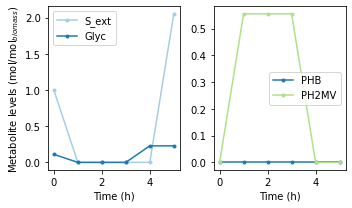

In [7]:
# Function usage on succinate:
excel_file = 'cFBA_base_succinate.xlsx'
output_file = 'cFBA_base_succinate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'S_ext', 0, 1],
    ['equality', 'S_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Fumarate

SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_fumarate.xml.
Test on model with no growth: optimal
Time simulation:
0.03 min
Growth of the system: 1.4915


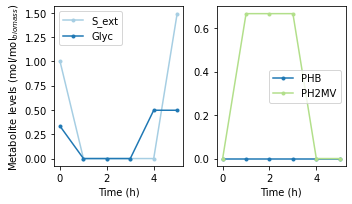

In [8]:
# Function usage on fumarate:
excel_file = 'cFBA_base_fumarate.xlsx'
output_file = 'cFBA_base_fumarate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'S_ext', 0, 1],
    ['equality', 'S_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Malate

SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_malate.xml.
Test on model with no growth: optimal
Time simulation:
0.05 min
Growth of the system: 1.4915


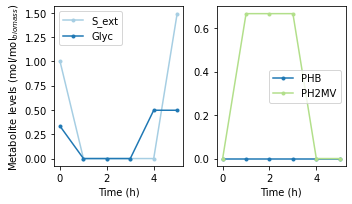

In [9]:
# Function usage on malate:
excel_file = 'cFBA_base_malate.xlsx'
output_file = 'cFBA_base_malate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'S_ext', 0, 1],
    ['equality', 'S_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Oxaloacetate

SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_oxaloacetate.xml.
Test on model with no growth: optimal
Time simulation:
0.05 min
Growth of the system: 2.2363


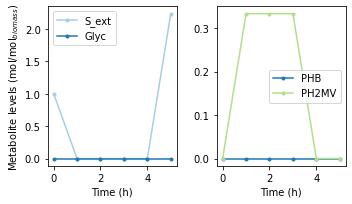

In [10]:
# Function usage on oxaloacetate:
excel_file = 'cFBA_base_oxaloacetate.xlsx'
output_file = 'cFBA_base_oxaloacetate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'S_ext', 0, 1],
    ['equality', 'S_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Butyrate

SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_butyrate.xml.
Test on model with no growth: optimal
Time simulation:
0.04 min
Growth of the system: 3.0798


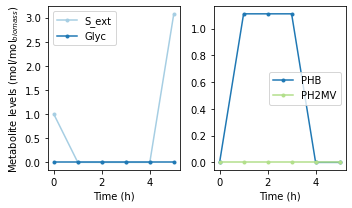

In [11]:
# Function usage on butyrate:
excel_file = 'cFBA_base_butyrate.xlsx'
output_file = 'cFBA_base_butyrate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'S_ext', 0, 1],
    ['equality', 'S_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Lactate

SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_lactate.xml.
Test on model with no growth: optimal
Time simulation:
0.04 min
Growth of the system: 2.4211


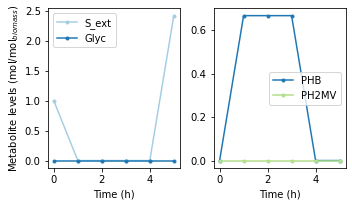

In [12]:
# Function usage on lactate:
excel_file = 'cFBA_base_lactate.xlsx'
output_file = 'cFBA_base_lactate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'S_ext', 0, 1],
    ['equality', 'S_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)

# Pyruvate


SBML document with metabolites information and catalysis annotations has been created and saved to cFBA_base_pyruvate.xml.
Test on model with no growth: optimal
Time simulation:
0.03 min
Growth of the system: 2.2269


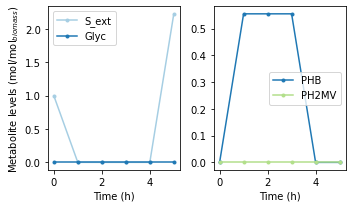

In [13]:
# Function usage on lactate:
excel_file = 'cFBA_base_pyruvate.xlsx'
output_file = 'cFBA_base_pyruvate.xml'
quotas = [
    ['equality', 'Acetate', 0, 0],
    ['equality', 'Acetate', 1, 0],
    ['equality', 'S_ext', 0, 1],
    ['equality', 'S_ext', 1, 0],
]
dt = 1  # Example time step, adjust as per your needs

run_simulation(excel_file, output_file, quotas, dt)